In [7]:
# importing library
import pandas as pd
import numpy as np

In [8]:
# importing datas
df = pd.read_csv("/content/onlinefraud.csv")

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [10]:
#DATA PREPROCESSING
df.isFraud.unique()

array([ 0.,  1., nan])

In [11]:
df.isFlaggedFraud.unique()

array([ 0., nan])

In [12]:
# 0.0 -> not a Fraud transaction
#0.1 -> is a Fraud transaction

In [13]:
# SUPERVIED LEARNING -> TARGET (ISFRAUD)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,56203.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000,56202.0
mean,7.624451,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779,0.0
std,1.999414,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000,0.0
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


In [15]:
# Finding The Missing Value
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
56198,False,False,False,False,False,False,False,False,False,False,False
56199,False,False,False,False,False,False,False,False,False,False,False
56200,False,False,False,False,False,False,False,False,False,False,False
56201,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

,0
step,0
type,0
amount,1
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [17]:
# Handling The Missing Values
df2 = df.fillna(value = 0)

In [18]:
df2.isnull().sum().sum()

np.int64(0)

<Axes: >

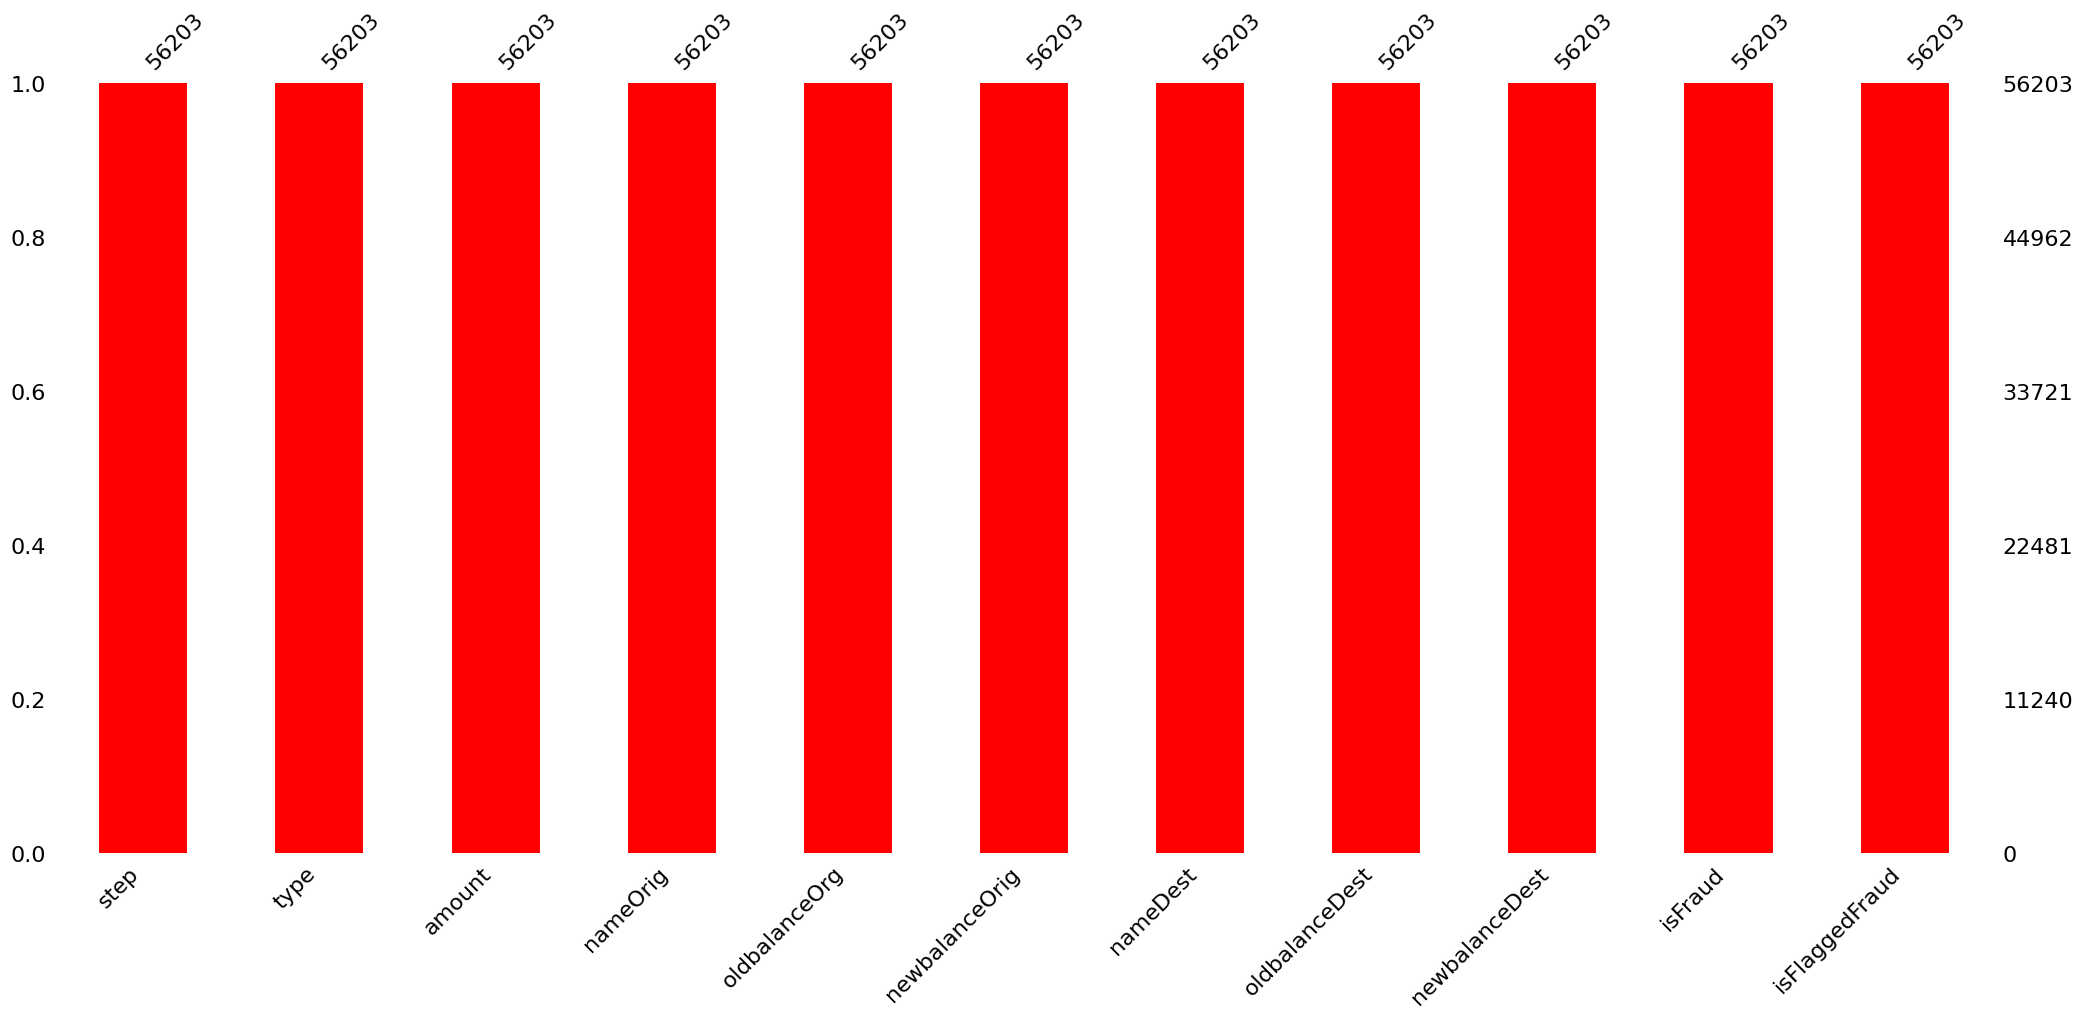

In [19]:
import missingno as msno
msno.bar(df2,color='red')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56203 non-null  float64
 3   nameOrig        56203 non-null  object 
 4   oldbalanceOrg   56203 non-null  float64
 5   newbalanceOrig  56203 non-null  float64
 6   nameDest        56203 non-null  object 
 7   oldbalanceDest  56203 non-null  float64
 8   newbalanceDest  56203 non-null  float64
 9   isFraud         56203 non-null  float64
 10  isFlaggedFraud  56203 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


In [21]:
# defining target(x) and features(y)
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [22]:
#WE HANDLE THE MISSING VALUE IN THE DATA SET

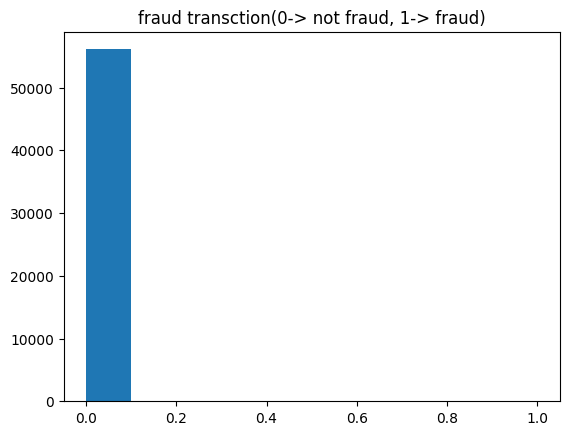

In [23]:
import matplotlib.pyplot as plt
plt.hist(df['isFraud'])
plt.title('fraud transction(0-> not fraud, 1-> fraud)')
plt.show()

In [24]:
y = df2['type']

In [25]:
x = df2.drop(['step','type','nameOrig', 'nameDest'],axis=1)

In [26]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2529)

In [27]:
# check the shape of train and test sample
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((39342, 7), (16861, 7), (39342,), (16861,))

In [28]:
# select the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [29]:
# train and fit the model
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [30]:
model.intercept_

array([-3.33286584e-06,  4.78385938e-06, -1.15495054e-06, -4.69336049e-07,
        4.31017710e-05, -4.29284780e-05])

In [31]:
model.coef_

array([[ 2.31345789e-04, -2.21620967e-03,  2.53850489e-03,
         9.68610609e-04,  7.58070943e-04, -4.33083795e-09,
         0.00000000e+00],
       [ 5.19556741e-04,  5.21861609e-04, -2.21581768e-04,
         9.70330312e-04,  7.57809030e-04,  5.96909738e-08,
         0.00000000e+00],
       [-6.10826201e-04,  1.49035751e-03, -1.18862898e-03,
         9.70554070e-04,  7.58046314e-04, -8.66343559e-09,
         0.00000000e+00],
       [-1.26000944e-03, -8.19615999e-04, -7.33990957e-04,
        -5.20347178e-04, -8.11256363e-04, -1.81927858e-09,
         0.00000000e+00],
       [ 5.99123399e-04,  5.03710740e-04, -1.73937026e-04,
        -3.35951103e-03, -2.22030614e-03, -1.30601176e-07,
         0.00000000e+00],
       [ 5.20809715e-04,  5.19895814e-04, -2.20366156e-04,
         9.70363221e-04,  7.57636214e-04,  8.57237547e-08,
         0.00000000e+00]])

In [32]:
# predict the model
y_pred = model.predict(x_test)

In [33]:
y_pred

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', ..., 'CASH_OUT', 'PAYMENT',
       'PAYMENT'], dtype=object)

In [34]:
# model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[3034,    3,    1,    1,    0],
       [   8, 2206,   14,   48, 2472],
       [  13,  154,   21,    0,   13],
       [   0,    0,    0, 7268,    0],
       [   0,  445,    3,   31, 1126]])

In [36]:
accuracy_score(y_test,y_pred)

0.8098570666034043

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     CASH_IN       0.99      1.00      1.00      3039
    CASH_OUT       0.79      0.46      0.58      4748
       DEBIT       0.54      0.10      0.17       201
     PAYMENT       0.99      1.00      0.99      7268
    TRANSFER       0.31      0.70      0.43      1605

    accuracy                           0.81     16861
   macro avg       0.72      0.65      0.64     16861
weighted avg       0.86      0.81      0.82     16861



In [38]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df.head()
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df_model.head()
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
y = df_model["isFraud"]
x = df_model.drop("isFraud",axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=y)
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numeric),
        ("cat",OneHotENcoder(drop = "first"),
         categorical)
    ],
    remainder ="drop"
)
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clt",LogisticRegression(class_weight="balance",max_iter=1000))])
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

ValueError: Input y contains NaN.

In [46]:
import  joblib
joblib,dump(pipeline,"onlinefrauddetection.pkl")

NameError: name 'dump' is not defined

In [47]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [48]:
import streamlit as st
import pandas as pd
import joblib
model = joblib.load("onlinefrauddetection.pkl")
st.title("online fraud detection app")
st.markdown("please enter the transaction detailes and use the button")
st.driver()
transaction_type = st.selectbox("Transaction Type",["Payment","Transfer","Cash_Out","Deposite"])
amount = st.number_input("Amount", min_value = 0.0,value = 1000.0)
oldbalanceOrg = st.number_input("old Balance(Sender)",min_value = 0.0,value = 9000.0)
newbalanceOrig = st.number_input("New Balance (Sender)",min_value = 0.0, value = 9000.0)
oldbalancedest = st.number_input("old balance(Receiver)",min_value = 0.0, value =0.0)
newbalancedest = st.number_input("New Balance (Receiver)",min_value = 0.0,value=0.0)

if st.button("predict"):
  input_data = pd.DataFrame([{
      "type":transaction_type,
      "amount":amount,
      "oldbalanceOrg":oldbalanceOrg,
      "newbalanceOrig":newbalanceOrig,
      "oldbalanceDest":oldbalanceDest,
      "newbalanceDest":newbalanceDest
  }])

  prediction = model.predict(input_data)[0]
  st.subheader(f"prediction:'{int(prediction)}'")

  if prediction == 1:
       st.error("This transaction is fraud")
  else:
       st.success("This transaction looks like is not a fraud")


FileNotFoundError: [Errno 2] No such file or directory: 'onlinefrauddetection.pkl'